In [251]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mode

def train_test_split(X, y, percent):
    split = int(len(X)*percent)
    X_train, y_train = X[:split], y[:split]
    X_test, y_test = X[split:], y[split:]
    
    return X_train, y_train, X_test, y_test
    
class KNN:
    def __init__(self, k = 3):
        self.k = k
        
    def euclidian_distance(self, a, b):
        return np.sqrt((np.sum(a-b)**2))
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        
        self.n, self.features = X_train.shape
        
    def predict(self, X_test):
        y_preds = np.zeros(X_test.shape[0])
        
        for i in range(X_test.shape[0]):
            
            distances_per_object = np.zeros(self.n)
            
            for j in range(self.n):
                
                euc = self.euclidian_distance(X_test[i], self.X_train[j])
                distances_per_object[j] = euc
                
            idx = np.argsort(distances_per_object)
            target_sorted = self.y_train[idx][:self.k]
            y_preds[i] = mode(target_sorted, keepdims=False)[0]
        
        return y_preds
        
        
def accuracy(y_true, y_preds):
    trues = 0
    for i in range(len(y_true)):
        if y_true[i] == y_preds[i]:
            trues += 1
    return trues/len(y_true)

In [254]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples = 100, n_features = 2, n_redundant = 0, n_informative = 2, n_clusters_per_class = 1, random_state = 35)

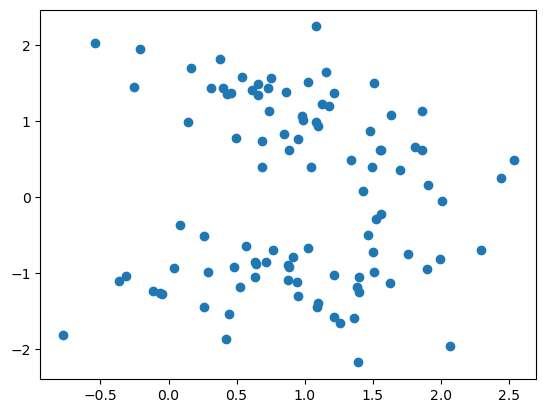

In [262]:
plt.scatter(X[:,0], X[:,1]);

In [256]:
X_train, y_train, X_test, y_test = train_test_split(X, y, 0.7)

In [258]:
knn = KNN(k=3)
knn.fit(X_train, y_train)
preds = knn.predict(X_test)

In [261]:
accuracy(y_test, preds)

0.8666666666666667